In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Retail_Transactions_2000.csv')
display(df.head(5))
display(df.shape)
display(df.columns)
display()

,TransactionID,CustomerID,Gender,Age,City,ProductCategory,Quantity,Price,PurchaseDate,PaymentMode,TotalAmount
0,T00001,C2824,Female,33,Bengaluru,Fashion,3,4479,2023-03-15,Cash,13437
1,T00002,C1409,Other,20,Pune,Books,5,1051,2023-01-22,Card,5255
2,T00003,C5506,Other,47,Pune,Furniture,1,111,2023-04-18,Wallet,111
3,T00004,C5012,Other,21,Hyderabad,Groceries,5,2946,2023-08-09,Cash,14730
4,T00005,C4657,Female,41,Chennai,Sports,1,3123,2023-09-23,Wallet,3123


(2000, 11)

Index(['TransactionID', 'CustomerID', 'Gender', 'Age', 'City',
       'ProductCategory', 'Quantity', 'Price', 'PurchaseDate', 'PaymentMode',
       'TotalAmount'],
      dtype='object')

In [127]:
display(df.isnull().sum())
display(df.duplicated().sum())

TransactionID      0
CustomerID         0
Gender             0
Age                0
City               0
ProductCategory    0
Quantity           0
Price              0
PurchaseDate       0
PaymentMode        0
TotalAmount        0
dtype: int64

np.int64(0)

In [128]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    print(f"{col}: Skewness = {df[col].skew():.2f}")

Age: Skewness = -0.07
Quantity: Skewness = 0.04
Price: Skewness = 0.04
TotalAmount: Skewness = 0.91


In [129]:
from sklearn.preprocessing import PowerTransformer

num_cols = df.select_dtypes(include=['int64', 'float64']).columns

skewed_cols = [col for col in num_cols if abs(df[col].skew()) > 0.5]

pt = PowerTransformer(method='yeo-johnson')
df[skewed_cols] = pt.fit_transform(df[skewed_cols])

for col in skewed_cols:
    print(f"{col}: Skewness (after Yeo-Johnson) = {df[col].skew():.2f}")

TotalAmount: Skewness (after Yeo-Johnson) = -0.08


In [130]:
object_columns = df.select_dtypes(include='object').columns.tolist()
print("Object dtype columns:", object_columns)

Object dtype columns: ['TransactionID', 'CustomerID', 'Gender', 'City', 'ProductCategory', 'PurchaseDate', 'PaymentMode']


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in object_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  

print("Label encoded columns:", object_columns)
df.head(5)

Label encoded columns: ['TransactionID', 'CustomerID', 'Gender', 'City', 'ProductCategory', 'PurchaseDate', 'PaymentMode']


,TransactionID,CustomerID,Gender,Age,City,ProductCategory,Quantity,Price,PurchaseDate,PaymentMode,TotalAmount
0,0,355,0,33,1,3,3,4479,73,1,1.087753
1,1,59,2,20,9,1,5,1051,21,0,-0.090227
2,2,879,2,47,9,4,1,111,107,3,-2.557705
3,3,779,2,21,4,5,5,2946,219,1,1.222034
4,4,702,0,41,2,6,1,3123,264,3,-0.612600


In [132]:
for col in ['Quantity', 'Price']:
    has_positive = (df[col] > 0).any()
    has_negative = (df[col] < 0).any()
    has_zero = (df[col] == 0).any()
    print(f"{col} has positive numbers:", has_positive)
    print(f"{col} has negative numbers:", has_negative)
    print(f"{col} has zero values:", has_zero)
    print()

Quantity has positive numbers: True
Quantity has negative numbers: False
Quantity has zero values: False

Price has positive numbers: True
Price has negative numbers: False
Price has zero values: False



In [133]:
df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'], errors='coerce')
df['Month'] = df['PurchaseDate'].dt.month
df['DayOfWeek'] = df['PurchaseDate'].dt.dayofweek   # Monday=0, Sunday=6

bins = [0, 18, 25, 40, 60, 100]
labels = ['<18', '18-25', '26-40', '41-60', '60+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

print(df[['Month', 'DayOfWeek', 'Age', 'AgeGroup']].head())

   Month  DayOfWeek  Age AgeGroup
0      1          3   33    26-40
1      1          3   20    18-25
2      1          3   47    41-60
3      1          3   21    18-25
4      1          3   41    41-60


In [134]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_cols = ['Age','TotalAmount']
df[num_cols] = scaler.fit_transform(df[num_cols])

In [135]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    print(f"{col}: Skewness = {df[col].skew():.2f}")

TransactionID: Skewness = 0.00
CustomerID: Skewness = 0.00
Gender: Skewness = 0.00
Age: Skewness = -0.07
City: Skewness = 0.01
ProductCategory: Skewness = 0.02
Quantity: Skewness = 0.04
Price: Skewness = 0.04
PaymentMode: Skewness = -0.00
TotalAmount: Skewness = -0.08


In [136]:
missing = df.isnull().sum()
print("Missing values in columns:\n", missing)

print("Invalid Quantity:", (df['Quantity'] <= 0).sum())
print("Invalid Price:", (df['Price'] <= 0).sum())

Missing values in columns:
 TransactionID      0
CustomerID         0
Gender             0
Age                0
City               0
ProductCategory    0
Quantity           0
Price              0
PurchaseDate       0
PaymentMode        0
TotalAmount        0
Month              0
DayOfWeek          0
AgeGroup           0
dtype: int64
Invalid Quantity: 0
Invalid Price: 0


In [137]:
df.to_csv('Retail_Cleaned.csv', index=False)
print("Cleaned dataset saved as Retail_Cleaned.csv")

Cleaned dataset saved as Retail_Cleaned.csv


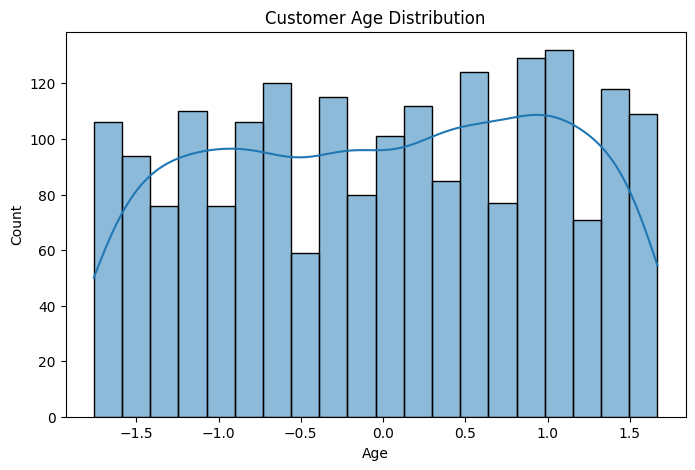

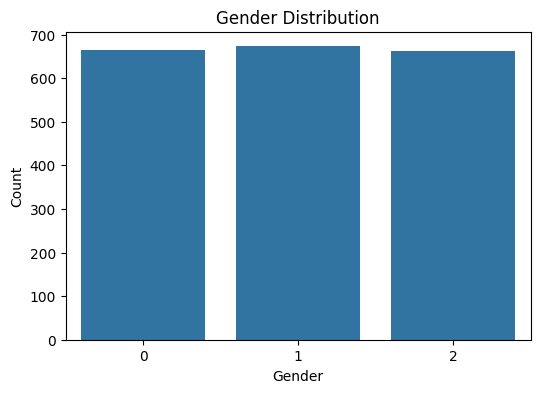

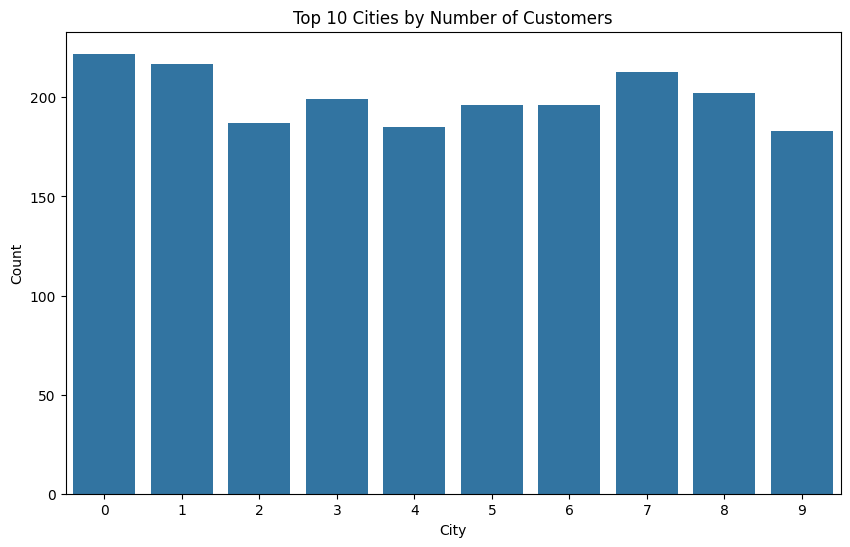

In [139]:
# Age distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Gender distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Top 10 cities by customer count
plt.figure(figsize=(10,6))
top_cities = df['City'].value_counts().head(10)
sns.barplot(x=top_cities.index, y=top_cities.values)
plt.title('Top 10 Cities by Number of Customers')
plt.xlabel('City')
plt.ylabel('Count')
plt.show()

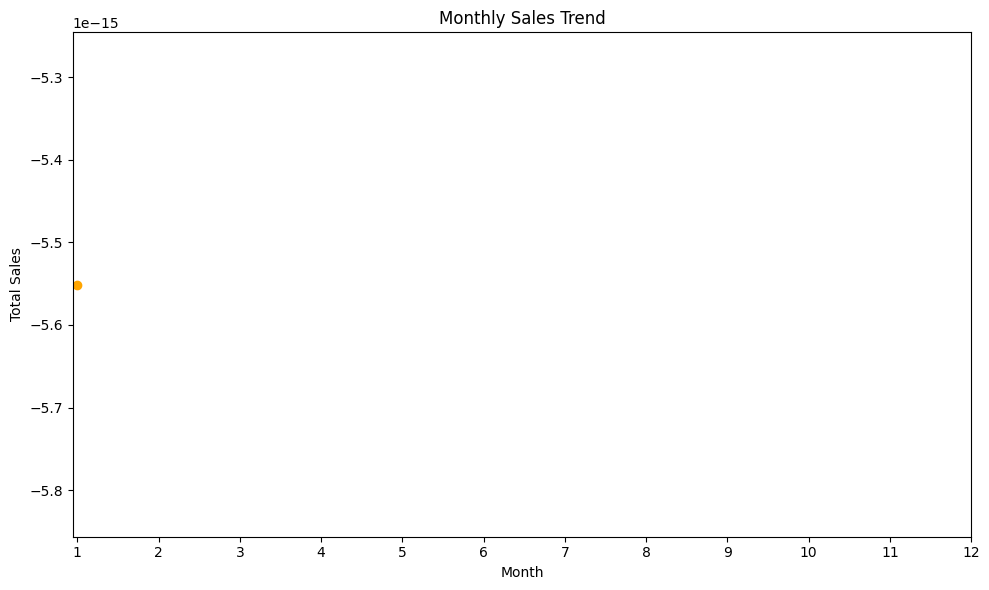

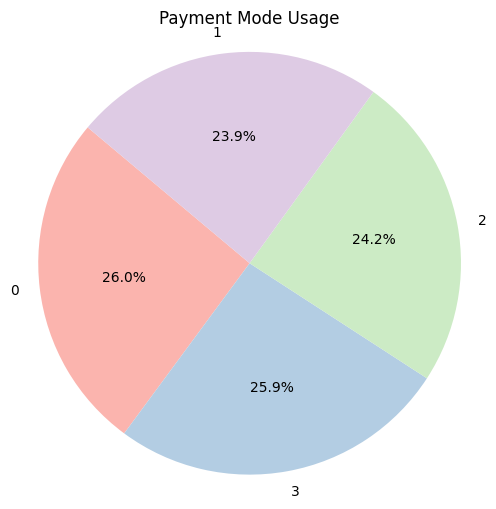

In [142]:
# ---- Monthly sales trend (line chart) ----
plt.figure(figsize=(10,6))
monthly_sales = df.groupby('Month')['TotalAmount'].sum()
monthly_sales.plot(kind='line', marker='o', color='orange')
plt.title('Monthly Sales Trend')
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.xticks(range(1,13))
plt.tight_layout()
plt.show()

# ---- Payment mode usage (pie chart) ----
plt.figure(figsize=(6,6))
payment_counts = df['PaymentMode'].value_counts()
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.title('Payment Mode Usage')
plt.axis('equal')
plt.show()

C:\Users\NISHAL\AppData\Local\Temp\ipykernel_1680\1656567824.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_spend_age = df.groupby('AgeGroup')['TotalAmount'].mean()


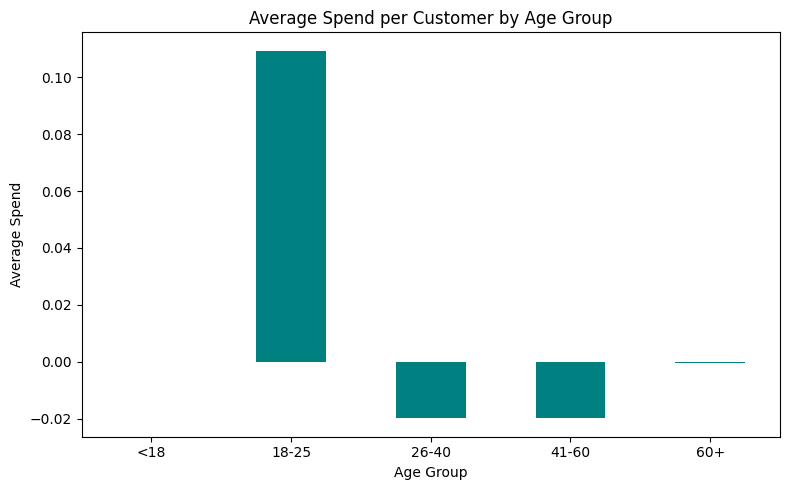

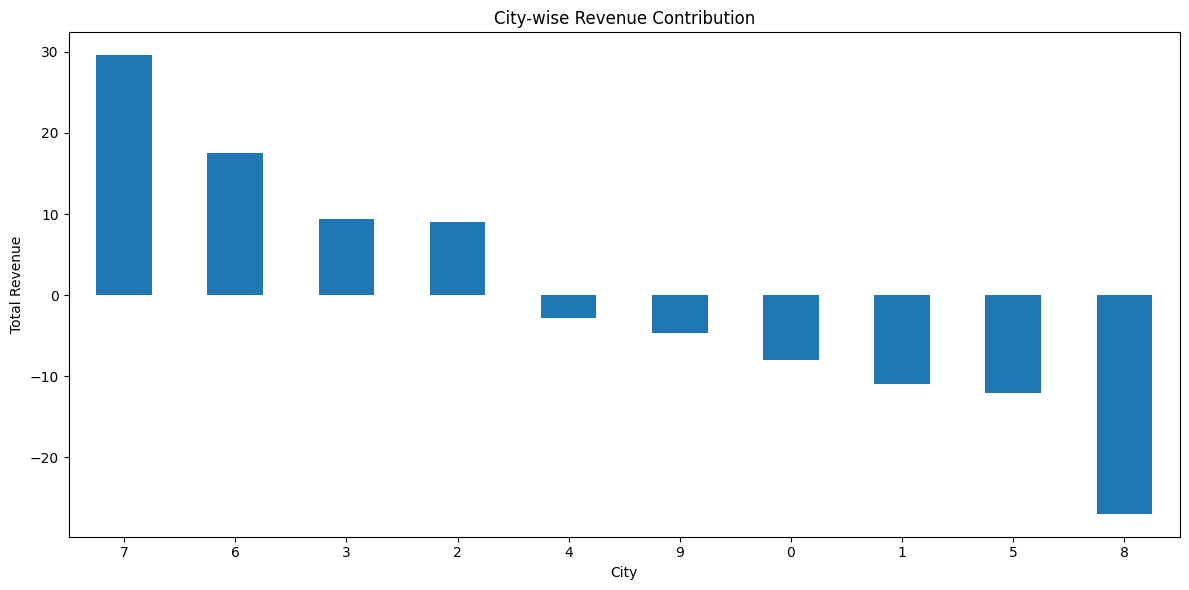

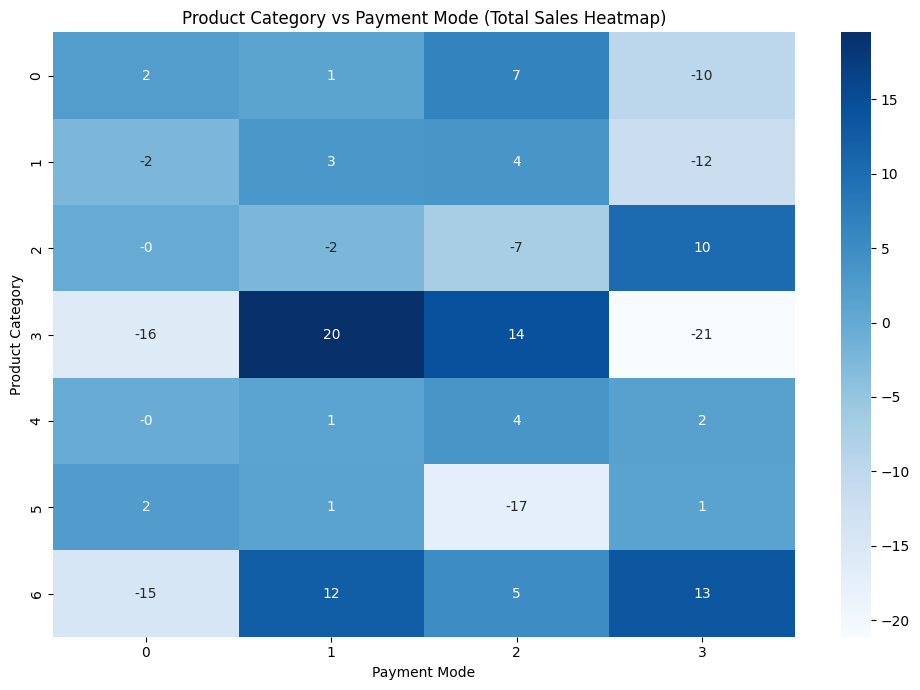

In [145]:
# --- Average spend per customer by age group ---
plt.figure(figsize=(8,5))
avg_spend_age = df.groupby('AgeGroup')['TotalAmount'].mean()
avg_spend_age.plot(kind='bar', color='teal')
plt.title('Average Spend per Customer by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Spend')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# --- City-wise revenue contribution (bar chart) ---
plt.figure(figsize=(12,6))
city_revenue = df.groupby('City')['TotalAmount'].sum().sort_values(ascending=False)
city_revenue.plot(kind='bar')
plt.title('City-wise Revenue Contribution')
plt.xlabel('City')
plt.ylabel('Total Revenue')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# --- Heatmap of product category vs payment mode ---
plt.figure(figsize=(10,7))
pivot = df.pivot_table(index='ProductCategory', columns='PaymentMode', values='TotalAmount', aggfunc='sum', fill_value=0)
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='Blues')
plt.title('Product Category vs Payment Mode (Total Sales Heatmap)')
plt.ylabel('Product Category')
plt.xlabel('Payment Mode')
plt.tight_layout()
plt.show()